## Projeto Árvore de Regressão:

Importando as bibliotecas:

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Função para filtrar a base de dados:

In [29]:
def filter_df (df):
    df.dropna(axis = 0, inplace = True)
    df['ocean_proximity'].replace({'<1H OCEAN': 1,
                                   'INLAND': 2,
                                   'NEAR OCEAN': 3,
                                   'NEAR BAY': 4,
                                   'ISLAND': 5},
                                   inplace = True
                                 )
    print(f'Linhas: {df.shape[0]} \nColunas: {df.shape[1]}')
    
    return df.head()

Leitura da base de dados:

In [13]:
df = pd.read_csv('housing.csv', delimiter = ',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Filtragem base de dados:

In [31]:
filter_df(df)

Linhas: 20433 
Colunas: 10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


Calculando a matriz de correlação para melhor entendimento dos dados:

In [33]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.439787
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.390885
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.145469
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.016174
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.021466
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.083097
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.027488
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.039270
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.020952
ocean_proximity,-0.439787,0.390885,0.145469,-0.016174,-0.021466,-0.083097,-0.027488,-0.039270,0.020952,1.000000


Plotagem do clustermap para melhor vizualização da matriz de correlação:

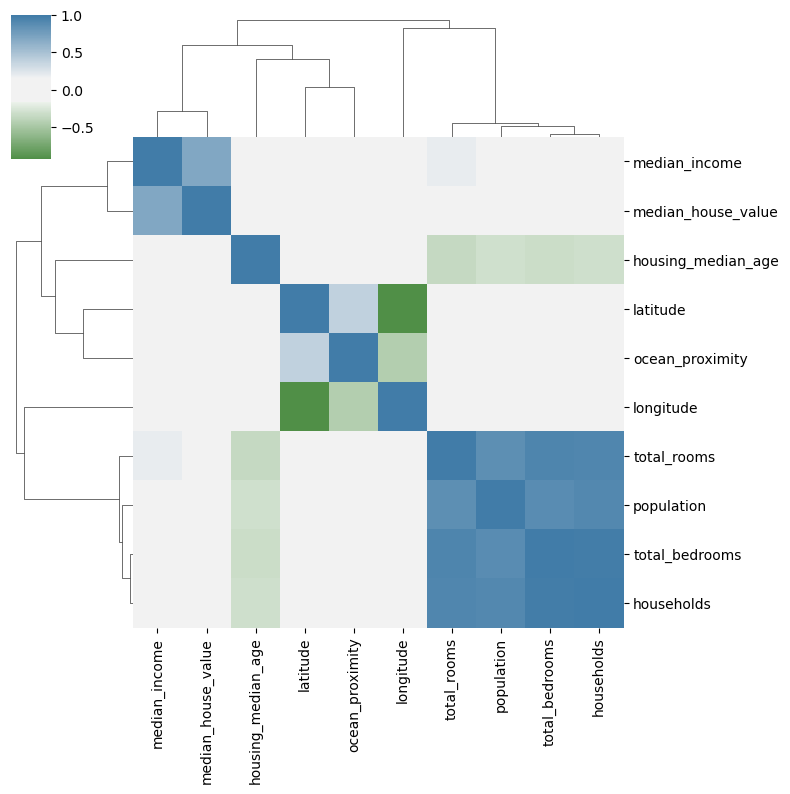

In [35]:
color = sns.diverging_palette(h_neg=125, 
                              h_pos=600,
                              as_cmap=True,
                              sep = 40, 
                              center = 'light')

sns.clustermap(df.corr(), 
               figsize=(8, 8), 
               center = 0,
               cmap=color)

Variável ```median_income``` tem alta correlação com ```median_house_value```.

Separação entre matriz de recursos X e vetor de destino y:

In [200]:
X = df.drop(columns = ['median_house_value']).copy()
y = df[['median_house_value']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2309)

Análise de qual a melhor profundidade para a árvore:

<Axes: xlabel='n_minimo_obs_folhas', ylabel='profundidade'>

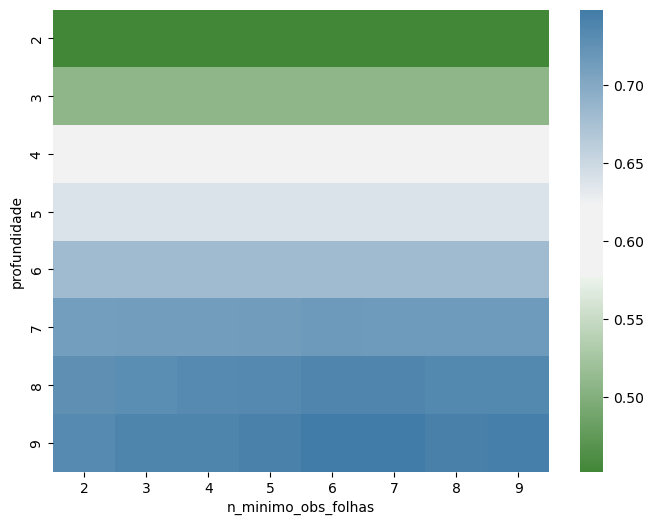

In [198]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 10):
    for j in range(2, 10):
        regr_tree_2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_tree_2.fit(X_train, y_train)
        mse1 = regr_tree_2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo_obs_folhas':ind_j})

color = sns.diverging_palette(h_neg=125, 
                              h_pos=600,
                              as_cmap=True,
                              sep = 40, 
                              center = 'light')

sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo_obs_folhas', values='mses'), cmap=color)

De acordo com o heatmap acima, a melhor profundidade é 2. Portando essa será a profundidade da árvore:

In [158]:
regr_tree_2 = DecisionTreeRegressor(max_depth=2)
regr_tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### Calculando o caminho indicado pelos CCP-alfas dessa árvore:

Cálculo do caminho indicado pelos ccp-alfas:

In [160]:
path = regr_tree_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.41260089e+08, 1.07176484e+09, 4.10447326e+09]),
 'impurities': array([7.36511799e+09, 8.10637808e+09, 9.17814292e+09, 1.32826162e+10])}

Gráfico Alpha efetivo x impureza total das folhas:

Text(0, 0.5, 'Impureza total das folhas')

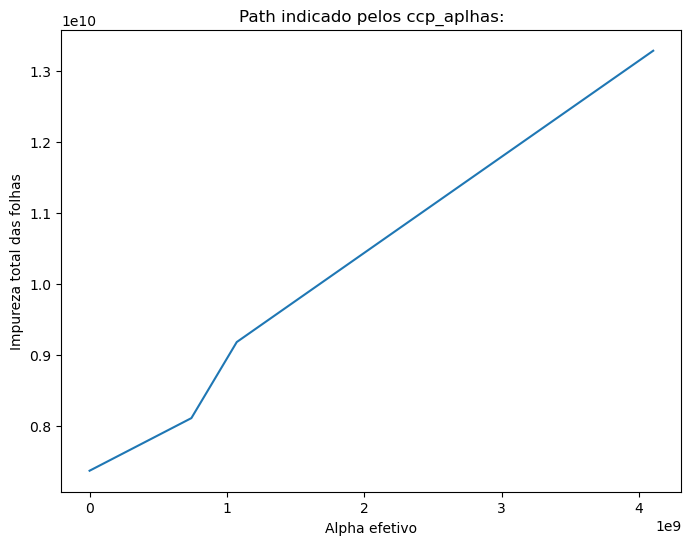

In [162]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.rc('figure', figsize=(8, 6))

plt.plot(ccp_alphas, impurities)
plt.title('Path indicado pelos ccp_aplhas:')
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas')

### Para cada valor de alpha obtido, treinando uma árvore com o respectivo alfa e guardando essa árvore em uma lista:

In [170]:
regrs = []

for ccp_alpha in ccp_alphas:
    regr = DecisionTreeRegressor(random_state=1, ccp_alpha=ccp_alpha)
    regr.fit(X_train, y_train)
    regrs.append(regr)

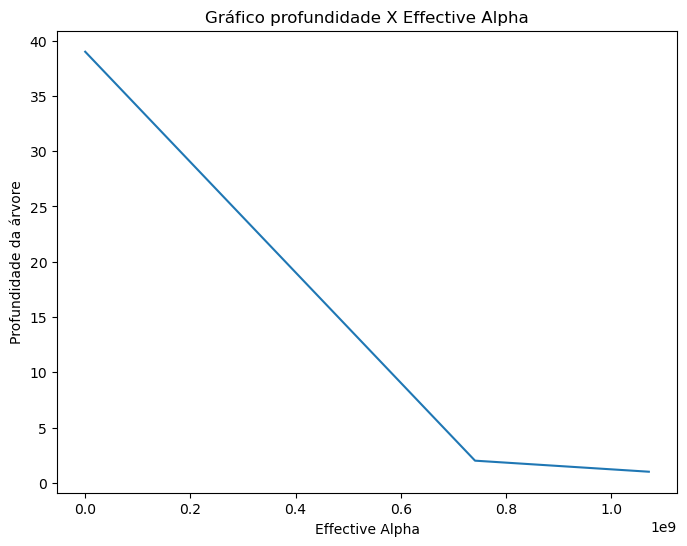

In [172]:
tree_depths = [regr.tree_.max_depth for regr in regrs]

plt.rc('figure', figsize=(8, 6))

plt.xlabel('Alpha efetivo')
plt.ylabel('Profundidade da árvore')
plt.title('Gráfico profundidade X Effective Alpha')
plt.plot(ccp_alphas[:-1],
         tree_depths[:-1]
        )

### Calculando o MSE da árvore para cada árvore na lista:

In [174]:
train_scores = [mean_squared_error(y_train, regr.predict(X_train)) for regr in regrs]
test_scores  = [mean_squared_error(y_test, regr.predict(X_test )) for regr in regrs]

### Montando um gráfico do MSE pelo alpha:

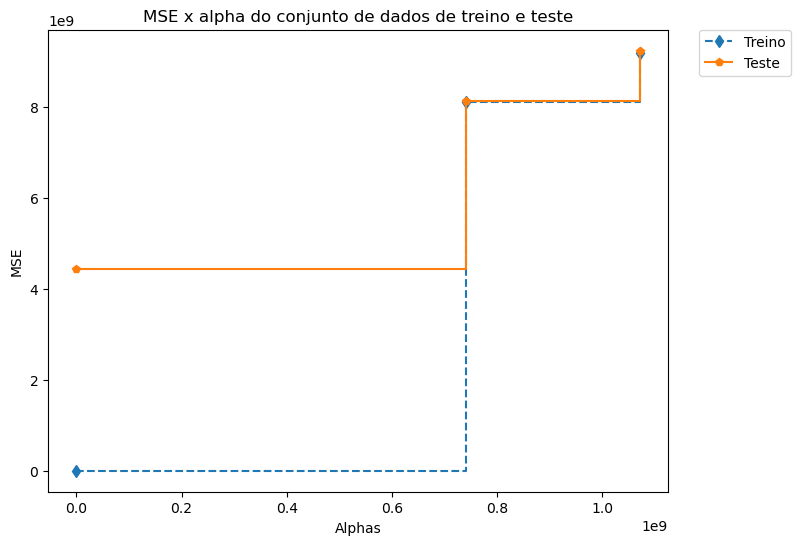

In [248]:
fig, ax = plt.subplots(figsize=(8, 6))


ax.set_xlabel('Alphas')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas[:-1],
        train_scores[:-1],
        marker='d',
        linestyle='--',
        label='Treino',
        drawstyle='steps-post'
       )

ax.plot(ccp_alphas[:-1],
        test_scores[:-1],
        marker='p',
        label='Teste',
        drawstyle='steps-post'
       )

ax.legend(bbox_to_anchor = (1.05, 1),
          loc = 2,
          borderaxespad = 0
         )

plt.show()

Para valores de alpha entre 0.1 e 0.69 são encontrados os valores mínimos de MSE.

Treinando a ávore com o valor escolhido de 4e+08:

In [251]:
regr_tree = DecisionTreeRegressor(ccp_alpha=4e+08)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=400000000.0)

### Calculando o R-quadrado dessa árvore encontrada acima:

In [253]:
y_pred = regr_tree.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f"Coeficiente de Determinação (R²): {r_squared}")

Coeficiente de Determinação (R²): 0.45233849514807467


### Visualizando a árvore:

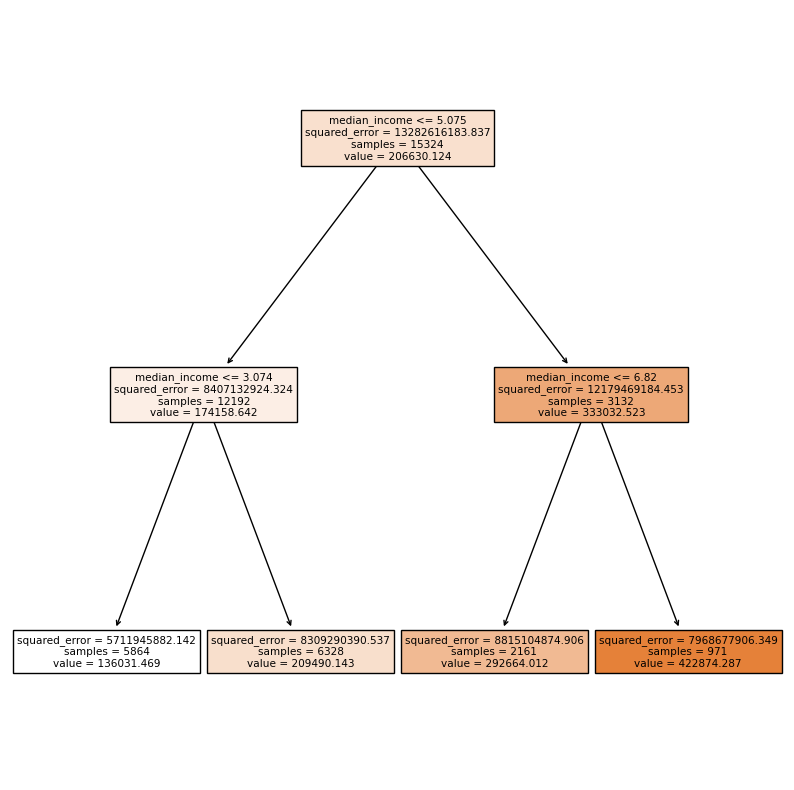

In [255]:
plt.rc('figure', figsize=(10, 10))
tree_plot = tree.plot_tree(regr_tree, 
                    feature_names=X.columns,  
                    filled=True) 